
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>
<p style="text-align: center;"> *Daxi Cheng(dc43342), Jianjie Zheng(jz23373)* </p>
<br>
Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Solution

# For Data 1, (X1,y1)

## part 1

In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
# load each data set
X1 = pd.read_csv('X1.csv', header=None)
y1 = pd.read_csv('y1.csv', header=None)
X2 = pd.read_csv('X2.csv', header=None)
y2 = pd.read_csv('y2.csv', header=None)

In [5]:
# split each data set into training and testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

## part 2

(10000, 30)


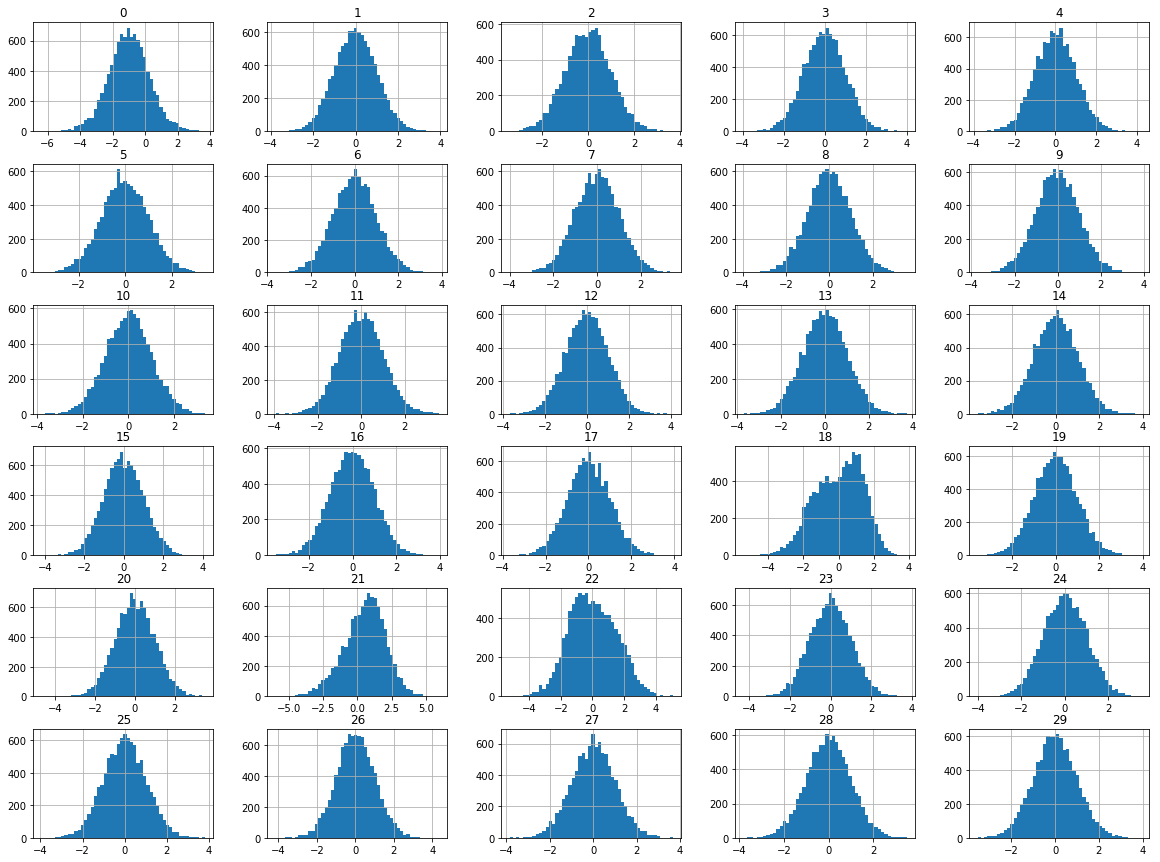

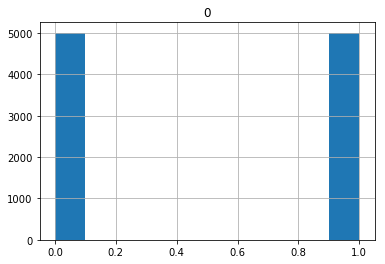

In [7]:
print X1.shape
X1.hist(bins=50, figsize=(20,15))
y1.hist()
plt.show()

In data set (X1,y1), every variable nearly perfect follows normal distribution except feature 25 is slightly different. And y value is either class 0 or class 1 and each class has similar size (5000 for class 0, 5000 for class 1). 

### RandomForest 

In [8]:
# train max_depth in RF
# Compute train and test errors
alphas = np.arange(2, 30, 1)
RF = RandomForestClassifier(criterion='entropy', random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    RF.set_params(max_depth=alpha)
    RF.fit(X1_train, y1_train)
    train_errors.append(RF.score(X1_train, y1_train))
    test_errors.append(RF.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter: %s" % alpha_optim)


Optimal regularization parameter: 25


In [9]:
# train max_features in RF
# Compute train and test errors
alphas = np.arange(2, 30, 1)
RF = RandomForestClassifier(criterion='entropy',max_depth=25, random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    RF.set_params(max_features=alpha)
    RF.fit(X1_train, y1_train)
    train_errors.append(RF.score(X1_train, y1_train))
    test_errors.append(RF.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 27


In [10]:
import time
start_time = time.time()
# using Random Forest 
# make criterion = 'entropy', test error changes from 0.1593 to 0.156666
# max_depth = 2 or 3 has same best test errors, test error is still 0.156666
# max_features = 12 improves from 0.15666 t0 0.15
RF = RandomForestClassifier(criterion='entropy',max_depth=25, random_state=0, max_features=27)
RF.fit(X1_train, y1_train)
y1_predicted_train = RF.predict(X1_train)
y1_predicted_test = RF.predict(X1_test)
print 'Training set MSE is', mean_squared_error(y1_train, y1_predicted_train)
print 'Testing set MSE is', mean_squared_error(y1_test, y1_predicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y1_test,y1_predicted_test)
print 'The features importance is shown as following matrix:\n',RF.feature_importances_
print 'accuracy rate is ',metrics.accuracy_score(y1_test,y1_predicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y1_test,y1_predicted_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))

Training set MSE is 0.00716417910448
Testing set MSE is 0.0866666666667
The confusion matrix is:
[[1534  147]
 [ 139 1480]]
The features importance is shown as following matrix:
[ 0.08090993  0.007824    0.0093053   0.00891166  0.00896675  0.0084533
  0.01110378  0.01162472  0.00829728  0.00857341  0.00782317  0.008809
  0.01065265  0.00784573  0.01038026  0.01027292  0.00863351  0.0089312
  0.13207927  0.00793462  0.00815846  0.10732236  0.44529364  0.0080658
  0.00915471  0.00807898  0.00857139  0.0090138   0.00923749  0.00977091]
accuracy rate is  0.913333333333
mean of error rate is  0.0866666666667
--- time of execution is 1.91400003433 seconds ---


In [11]:
# Random Forest using GridSearch method
# Create a classifier object with the classifier and parameter candidates
parameter_candidates = {
    'criterion': ('gini', 'entropy'),
    'max_depth': np.arange(2, 30, 5),
    'max_features': np.arange(10, 31, 10)
}
RF = RandomForestClassifier(random_state=0)
RFGS = GridSearchCV(estimator=RF, param_grid=parameter_candidates, cv=10)

# Train the classifier on data1's feature and target data
RFGS.fit(X1_train, y1_train)
print RFGS.best_params_
print RFGS.best_score_

IndexError: too many indices for array

### Gradient Boosting Decision Tree

In [69]:
# using Gradient Boosting Decision Tree

parameter_candidates = {
    'loss': ('deviance', 'exponential'),
    'learning_rate': np.logspace(-2, 2, 4),
    'max_depth': np.arange(2, 20, 6),
    'max_features':np.arange(2, 31, 7)
}
GBDT = GradientBoostingClassifier()
GBDTGS = GridSearchCV(estimator=GBDT, param_grid=parameter_candidates, cv=3,n_jobs=4)

GBDTGS.fit(X1_train, y1_train)
print GBDTGS.best_params_
print GBDTGS.best_score_

{'max_features': 30, 'loss': 'exponential', 'learning_rate': 0.21544346900318834, 'max_depth': 8}
0.921928646067


### XGBoost

In [12]:
# train max_depth in XGB
# Compute train and test errors
alphas = np.arange(2, 30, 1)
XGB = XGBClassifier(learning_rate=0.1,random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(max_depth=alpha)
    XGB.fit(X1_train, y1_train)
    train_errors.append(XGB.score(X1_train, y1_train))
    test_errors.append(XGB.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 11


In [13]:
# train learning_rate in XGB
# Compute train and test errors
alphas = np.arange(0, 1, 0.1)
XGB = XGBClassifier(max_depth=11,random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(learning_rate=alpha)
    XGB.fit(X1_train, y1_train)
    train_errors.append(XGB.score(X1_train, y1_train))
    test_errors.append(XGB.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 0.1


In [14]:
# train booster in XGB, default = gbtree
alphas = ['gbtree','gblinear','dart']
XGB = XGBClassifier(max_depth=11,learning_rate=0.1,random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(booster=alpha)
    XGB.fit(X1_train, y1_train)
    train_errors.append(XGB.score(X1_train, y1_train))
    test_errors.append(XGB.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)


Optimal regularization parameter : gbtree


In [15]:
# training objective in XGB, default is 'reg:linear'
alphas = ['reg:linear','reg:logistic','binary:logistic','binary:logitraw']
XGB = XGBClassifier(max_depth=11,learning_rate=0.1,booster='gbtree',random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(objective=alpha)
    XGB.fit(X1_train, y1_train)
    train_errors.append(XGB.score(X1_train, y1_train))
    test_errors.append(XGB.score(X1_test, y1_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)


Optimal regularization parameter : binary:logitraw


In [16]:
# final trained XGB model
import time
start_time = time.time()
# specify parameters via map
XGB = XGBClassifier(max_depth=11, learning_rate=0.1,objective = 'binary:logitraw',booster='gbtree',random_state=0)
XGB.fit(X1_train, y1_train)
y1_XGBpredicted_train = XGB.predict(X1_train)
y1_XGBpredicted_test = XGB.predict(X1_test)
print 'Training set MSE is', mean_squared_error(y1_train, y1_XGBpredicted_train)
print 'Testing set MSE is', mean_squared_error(y1_test, y1_XGBpredicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y1_test,y1_XGBpredicted_test)
print 'The features importance is shown as following matrix:\n',XGB.feature_importances_
print 'accuracy rate is',metrics.accuracy_score(y1_test,y1_XGBpredicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y1_test,y1_XGBpredicted_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))


Training set MSE is 0.0
Testing set MSE is 0.0690909090909
The confusion matrix is:
[[1570  111]
 [ 117 1502]]
The features importance is shown as following matrix:
[ 0.09476739  0.02657114  0.02076721  0.02221819  0.02765938  0.02049515
  0.02366918  0.02249025  0.01931622  0.02176476  0.02221819  0.02330643
  0.02720595  0.01850004  0.02657114  0.02330643  0.0248481   0.02330643
  0.11526254  0.02357849  0.02584565  0.10528702  0.0759046   0.02521085
  0.02176476  0.02502947  0.02539222  0.02103927  0.02548291  0.02122064]
accuracy rate is 0.930909090909
mean of error rate is  0.0690909090909
--- time of execution is 4.04399991035 seconds ---


# Dataset 2, (X2,y2)

(5000, 20)


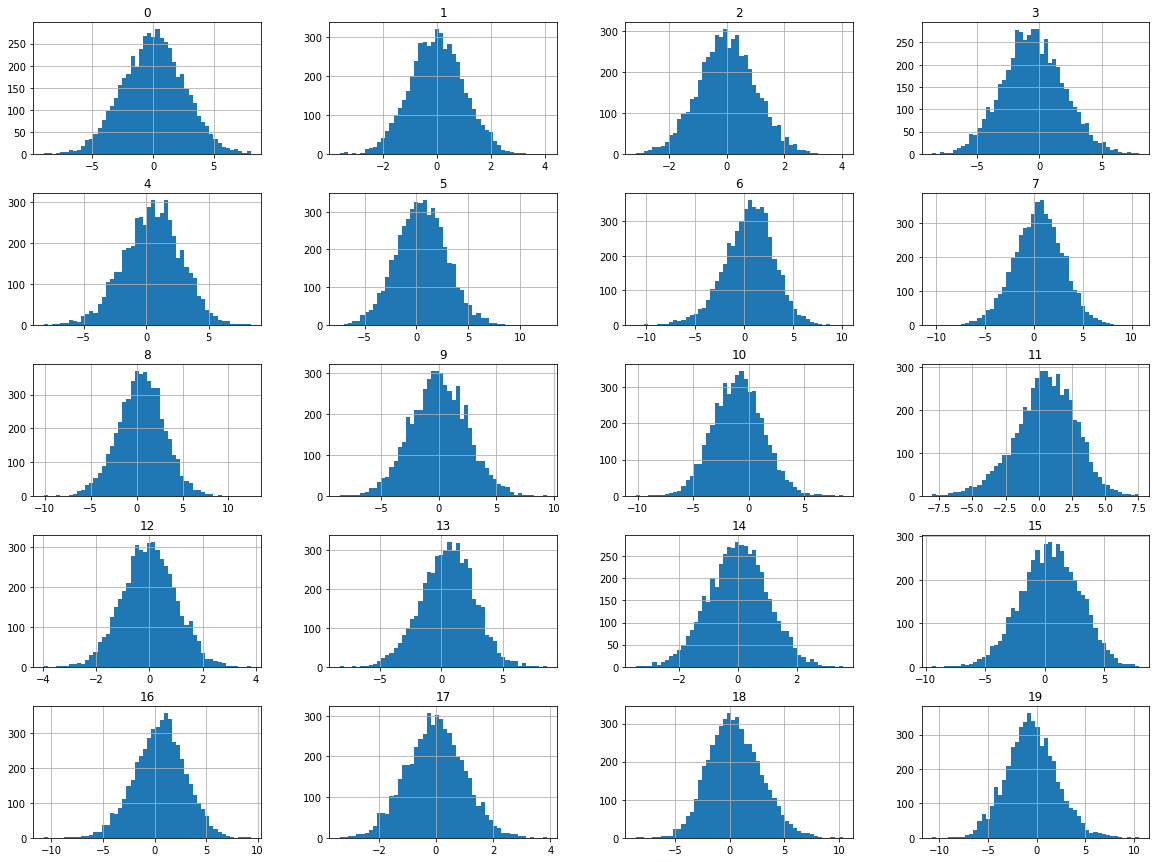

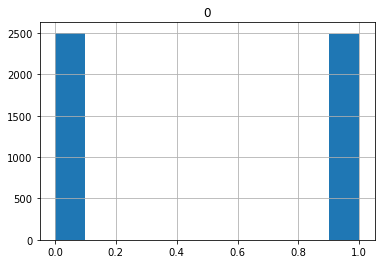

In [17]:
print X2.shape
X2.hist(bins=50, figsize=(20,15))
y2.hist()
plt.show()

### dataset 1 (X1, y1) has shape of (9999, 30), dataset 2 (X2, y2) has shape of (4999, 20), so dataset 2 has half data size compare to dataset 1 and less features than dataset 1.

## Random Forest 

In [18]:
# train max_depth in RF
# Compute train and test errors
alphas = np.arange(2, 30, 1)
RF = RandomForestClassifier(criterion='entropy', random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    RF.set_params(max_depth=alpha)
    RF.fit(X2_train, y2_train)
    train_errors.append(RF.score(X2_train, y2_train))
    test_errors.append(RF.score(X2_test, y2_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter: %s" % alpha_optim)


Optimal regularization parameter: 16


In [19]:
# train max_features in RF
# Compute train and test errors
alphas = np.arange(2, 20, 1)
RF = RandomForestClassifier(criterion='entropy',max_depth=16, random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    RF.set_params(max_features=alpha)
    RF.fit(X2_train, y2_train)
    train_errors.append(RF.score(X2_train, y2_train))
    test_errors.append(RF.score(X2_test, y2_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 5


In [20]:
# using Random Forest 
# make criterion = 'entropy', test error changes from 0.1593 to 0.156666
# max_depth = 2 or 3 has same best test errors, test error is still 0.156666
# max_features = 12 improves from 0.15666 t0 0.15
start_time = time.time()
RF = RandomForestClassifier(criterion='entropy',max_depth=16,max_features=5, random_state=0)
RF.fit(X2_train, y2_train)
y2_predicted_train = RF.predict(X2_train)
y2_predicted_test = RF.predict(X2_test)
print 'Training set MSE is', mean_squared_error(y2_train, y2_predicted_train)
print 'Testing set MSE is', mean_squared_error(y2_test, y2_predicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y2_test,y2_predicted_test)
print 'The features importance is shown as following matrix:\n',RF.feature_importances_
print 'accuracy rate is ',metrics.accuracy_score(y2_test,y2_predicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y2_test,y2_predicted_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))

Training set MSE is 0.00298507462687
Testing set MSE is 0.0757575757576
The confusion matrix is:
[[788  62]
 [ 63 737]]
The features importance is shown as following matrix:
[ 0.03037227  0.01585335  0.01457951  0.06166152  0.05097103  0.04899982
  0.03773354  0.05743618  0.04795763  0.14251678  0.04510235  0.08265842
  0.01091936  0.07481354  0.01227067  0.0733838   0.05472092  0.01634862
  0.0840964   0.03760428]
accuracy rate is  0.924242424242
mean of error rate is  0.0757575757576
--- time of execution is 0.239000082016 seconds ---


### Gradient Boosting Decision Tree

In [ ]:
# using Gradient Boosting Decision Tree

parameter_candidates = {
    'loss': ('deviance', 'exponential'),
    'learning_rate': np.logspace(-2, 2, 4),
    'max_depth': np.arange(2, 20, 6),
    'max_features':np.arange(2, 31, 7)
}
GBDT = GradientBoostingClassifier()
GBDTGS = GridSearchCV(estimator=GBDT, param_grid=parameter_candidates, cv=3,n_jobs=4)

GBDTGS.fit(X2_train, y2_train)
print GBDTGS.best_params_
print GBDTGS.best_score_

### XGBoost

In [22]:
# train max_depth in XGB
# Compute train and test errors
alphas = np.arange(2, 20, 1)
XGB = XGBClassifier(random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(max_depth=alpha)
    XGB.fit(X2_train, y2_train)
    train_errors.append(XGB.score(X2_train, y2_train))
    test_errors.append(XGB.score(X2_test, y2_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 8


In [25]:
# train learning_rate in XGB
# Compute train and test errors
alphas = np.arange(0, 1, 0.1)
XGB = XGBClassifier(max_depth=8,random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(learning_rate=alpha)
    XGB.fit(X2_train, y2_train)
    train_errors.append(XGB.score(X2_train, y2_train))
    test_errors.append(XGB.score(X2_test, y2_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 0.3


In [27]:
# train booster in XGB, default = gbtree
alphas = ['gbtree','gblinear','dart']
XGB = XGBClassifier(max_depth=8,learning_rate=0.3,random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(booster=alpha)
    XGB.fit(X2_train, y2_train)
    train_errors.append(XGB.score(X2_train, y2_train))
    test_errors.append(XGB.score(X2_test, y2_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)


Optimal regularization parameter : gbtree


In [28]:
# training objective in XGB, default is 'reg:linear'
alphas = ['reg:linear','reg:logistic','binary:logistic','binary:logitraw']
XGB = XGBClassifier(max_depth=7,learning_rate=0.3,booster='gbtree',random_state=0)
train_errors = list()
test_errors = list()
for alpha in alphas:
    XGB.set_params(objective=alpha)
    XGB.fit(X2_train, y2_train)
    train_errors.append(XGB.score(X2_train, y2_train))
    test_errors.append(XGB.score(X2_test, y2_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)


Optimal regularization parameter : binary:logitraw


In [29]:
# final trained XGB model
start_time = time.time()
# specify parameters via map
XGB2 = XGBClassifier(max_depth=8, learning_rate=0.3,objective = 'binary:logitraw',booster='gbtree',random_state=0)
XGB2.fit(X2_train, y2_train)
y2_XGBpredicted_train = XGB2.predict(X2_train)
y2_XGBpredicted_test = XGB2.predict(X2_test)
print 'Training set MSE is', mean_squared_error(y2_train, y2_XGBpredicted_train)
print 'Testing set MSE is', mean_squared_error(y2_test, y2_XGBpredicted_test)
print 'The confusion matrix is:\n',confusion_matrix(y2_test,y2_XGBpredicted_test)
print 'The features importance is shown as following matrix:\n',XGB2.feature_importances_
print 'accuracy rate is ',metrics.accuracy_score(y2_test,y2_XGBpredicted_test)
print 'mean of error rate is ', 1-metrics.accuracy_score(y2_test,y2_XGBpredicted_test)
print("--- time of execution is %s seconds ---" % (time.time() - start_time))

Training set MSE is 0.0
Testing set MSE is 0.050303030303
The confusion matrix is:
[[804  46]
 [ 37 763]]
The features importance is shown as following matrix:
[ 0.04848887  0.02424444  0.01826636  0.06908004  0.06376619  0.07007638
  0.0511458   0.0680837   0.05579542  0.06144138  0.05778811  0.06376619
  0.01959482  0.06144138  0.01727001  0.06974427  0.06077715  0.02025905
  0.05745599  0.04151445]
accuracy rate is  0.949696969697
mean of error rate is  0.050303030303
--- time of execution is 0.93499994278 seconds ---


## Conclusion

For dataset 1, the accuracy rates for Random Forest, GBDT, and XGB are 0.9133, 0.922 and 0.931 respectively. For dataset2, 

# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

## Solution

In [1]:
import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool, PanTool
from bokeh.transform import jitter
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ZoomInTool, ZoomOutTool
from bokeh.models import Legend
from bokeh.transform import factor_cmap
from bokeh.palettes import magma
# from bokeh.models import Select
# from bokeh.models.widgets import Toggle, Tabs
# from bokeh.layouts import row

data = pd.read_csv("nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)

In [2]:
PSG = data["PSG"]
Age = data['Age']
y = data["logsalary"]
team = data['Tm']
salary = data['SALARY']
positions = data['Pos']
players = data['Player']

source = ColumnDataSource(data=dict(
    PSG=PSG,
    Age=Age,
    y=y,
    team=team,
    salary=salary,
    positions=positions,
    players=players))

In [3]:
output_notebook()
def add_plot(x_values):
    #first we define the hover
    hover = HoverTool(tooltips=[("Player", "@players"), ("Team", "@team"), (
        "Position", "@positions"), ("Salary", "@salary"), (
            x_values, '$x')])

    p = figure(
        plot_height=600,
        plot_width=800,
        tools=[hover, BoxZoomTool()],
        title='PSG and Age vs LogSalary in NBA')

    p.scatter(
        x=jitter(x_values, width=0.1, range=p.x_range)
        if x_values == 'Age' else x_values,
        y='y',
        source=source,
        size=12,
        legend="positions",
        color=factor_cmap('positions', palette= magma(7),factors=positions))
    p.add_tools(PanTool(), ZoomInTool(), ZoomOutTool())

    p.xaxis.axis_label = x_values
    p.yaxis.axis_label = 'Log Salary'
    p.legend.orientation = "vertical"
    p.legend.location = "bottom_right"

    return p


tabs = Tabs(tabs=[
    Panel(child=add_plot('PSG'), title="PSG"),
    Panel(child=add_plot('Age'), title='Age')
])

show(tabs)

Loading BokehJS ...

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [22]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import grid_search

data_train = pd.read_csv('diabetes_train-log.csv')
data_test = pd.read_csv('diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

## SOLUTION

### A

In [26]:
from sklearn.metrics import fbeta_score, make_scorer
def per_class_accuracy(ground_truth, prediction):
    cm = confusion_matrix(ground_truth, prediction)
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / len(ground_truth)
my_scorer = make_scorer(per_class_accuracy, greater_is_better=True)

In [30]:
LinearSVC = SVC(kernel='linear')
tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100,1000]}
LinearSVCGS = GridSearchCV(
    LinearSVC,
    tuned_parameters,
    scoring=my_scorer,
    cv=10,
    )

LinearSVCGS.fit(xtrain, ytrain)
print 'Best C is ',LinearSVCGS.best_params_
print 'Best score is',LinearSVCGS.best_score_

Best C is  {'C': 1000}
Best score is 0.72


In [59]:
LinearSVC=SVC(C=1000, kernel='linear')
LinearSVC.fit(xtrain, ytrain)
ypredictedL = LinearSVC.predict(xtest)
conf_matL = confusion_matrix(ytest, ypredictedL)
conf_matL

array([[218,  27],
       [ 45,  67]])

In [42]:
def get_accuracy(cm):
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / (cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1])

In [60]:
print 'With linear kernel, the rest set accuracy is',get_accuracy(conf_matL)

With linear kernel, the rest set accuracy is 0.798319327731


### B

In [37]:
GaussianSVC = SVC(kernel='rbf')
GaussianSVCGS = GridSearchCV(
    GaussianSVC,
    tuned_parameters,
    scoring=my_scorer,
    cv=10,
    )

GaussianSVCGS.fit(xtrain, ytrain)
print 'Best C is ',GaussianSVCGS.best_params_
print 'Best score is',GaussianSVCGS.best_score_

Best C is  {'C': 10}
Best score is 0.69


In [54]:
GaussianSVC=SVC(C=10, kernel='rbf')
GaussianSVC.fit(xtrain, ytrain)
ypredictedL = GaussianSVC.predict(xtest)
conf_matL1 = confusion_matrix(ytest, ypredictedL)
conf_matL1

array([[205,  40],
       [ 41,  71]])

In [53]:
print 'With gaussian kernel, the rest set accuracy is',get_accuracy(conf_matL1)

With gaussian kernel, the rest set accuracy is 0.773109243697


### C

In this case, we found out that linear kernel actually perform better than the Gaussian kernel(79% vs 77%). This is probably because that this case is quite linear separable in the raw space, so the linear kernel have its advantage that with limited training data, it can figure out the linear boundary.